In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [ ]:
df = pd.read_csv('/content/titanic_train.csv')

In [ ]:
df

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,0,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,0
1,1,734,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S,0
2,2,383,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,0
3,3,705,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S,0
4,4,814,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,707,107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S,1
708,708,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,0
709,709,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S,0
710,710,436,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   712 non-null    int64  
 1   PassengerId  712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     710 non-null    object 
 12  Survived     712 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 72.4+ KB


In [ ]:
df = df.drop(columns=['Cabin', 'Unnamed: 0', 'Name', 'Ticket', 'PassengerId'])

In [ ]:
df['Age'].describe()

count    572.000000
mean      29.498846
std       14.500059
min        0.420000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: >

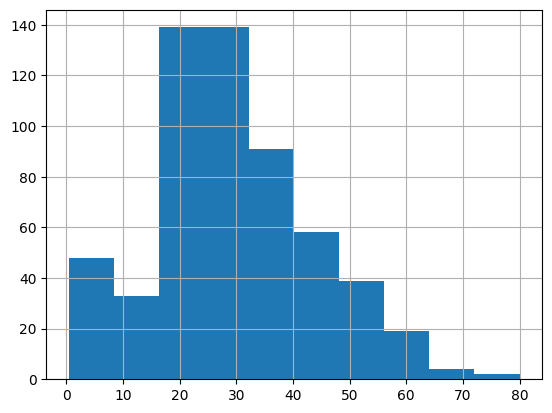

In [ ]:
df['Age'].hist()

In [ ]:
labelencoder = LabelEncoder()

df_le = df.copy()

df_le.loc[:, 'Sex'] = labelencoder.fit_transform(df_le.loc[:, 'Sex'])
df_le.loc[:, 'Embarked'] = labelencoder.fit_transform(df_le.loc[:, 'Embarked'])
df = df_le

<ipython-input-11-8b0321bbae89>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_le.loc[:, 'Sex'] = labelencoder.fit_transform(df_le.loc[:, 'Sex'])
<ipython-input-11-8b0321bbae89>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_le.loc[:, 'Embarked'] = labelencoder.fit_transform(df_le.loc[:, 'Embarked'])


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train= pd.DataFrame(X_train)
X_train.fillna(X_train.mean(), inplace=True)

In [ ]:
linmodel = RandomForestClassifier().fit(X_train, y_train)

In [ ]:
X_test= pd.DataFrame(X_test)
X_test.fillna(X_test.mean(), inplace=True)

In [ ]:
y_pred = linmodel.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
# Метрика -> max 0..1

print(accuracy_score(y_test, y_pred))

0.7832167832167832
